In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import graph_tool.all as gt
from datetime import datetime

from KcoreGenerator import *

In [6]:
motif3_f = open('dataset/fruitfly/motif-size-003-certificates.txt', 'r')
line = motif3_f.readline()
motif_counts = [0 for i in range(13)]
# motif_strs = []
while line:
    if ': ' in line:
        motif_id = str2gt[line.split(': ')[0]]
        motif_counts[motif_id] = int(line.split(': ')[1].strip())
    line = motif3_f.readline()

In [2]:
edge_df = pd.read_csv('dataset/fruitfly/condensed-edges.csv')
G = nx.from_pandas_edgelist(edge_df, 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', create_using=nx.DiGraph)
core_dict = nx.core_number(G)
core_list = [core_dict[k] for k in core_dict]


In [3]:
str2gt = {'000000000000000000000000000000800000000000000080': 1, '000000000000000000000000000000800000000000000040': 2, '0000000000000000000000000000000000000000000000c0': 0, '0000000000000000000000000000002000000000000000c0': 4, '000000000000004000000000000000800000000000000080': 5, '0000000000000020000000000000002000000000000000c0': 9, '0000000000000000000000000000008000000000000000c0': 3, '000000000000000000000000000000a000000000000000c0': 7, '000000000000004000000000000000a000000000000000c0': 11, '0000000000000040000000000000008000000000000000c0': 8, '0000000000000040000000000000002000000000000000c0': 10, '000000000000006000000000000000a000000000000000c0': 12, '000000000000004000000000000000200000000000000080': 6}
max(G.nodes)

7112622236

In [5]:
mapping = {}
idx = 0
for i in G.nodes:
    mapping[i] = idx
    idx += 1
    
G = nx.relabel_nodes(G, mapping)

In [8]:
rand_motifs = []
bidirection_edges = [ (u,v) for (u,v) in G.edges() if u in G[v] ]
p = len(bidirection_edges)/2 / (len(G.edges)-len(bidirection_edges)/2)
for i in range(5):
    rand_1 = generate_graph(core_list)
    gt_G = gt.Graph()
    for e in rand_1.edges:
        if random.uniform(0,1)<p:
            gt_G.add_edge(e[0],e[1])
            gt_G.add_edge(e[1],e[0])
        elif random.uniform(0,1)<0.5:
            gt_G.add_edge(e[0],e[1])
        else:
            gt_G.add_edge(e[1],e[0])

    rand_motif3 = gt.motifs(gt_G, 3)
    rand_motifs.append(rand_motif3[1])
    print('iteration', i, 'finished')
avg_motifs = np.average(np.array(rand_motifs), axis=0)


iteration 0 finished
iteration 1 finished
iteration 2 finished
iteration 3 finished
iteration 4 finished


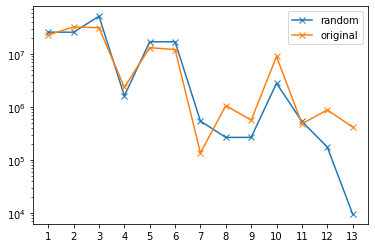

In [10]:
plt.plot([str(i) for i in range(1,14)], avg_motifs, marker='x',label='random')
plt.plot([str(i) for i in range(1,14)], [i for i in motif_counts],marker='x',label='original')
plt.yscale('log')
plt.legend() 
plt.show()